In [152]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url = ('https://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm')

r = requests.get(url)

soup = BeautifulSoup(r.content)

In [85]:
g_data = soup.find_all('tr', {'class': 'tcont'})


In [189]:
country = []
year = []
total_years = []
men_years = []
women_years = []

for item in g_data:
    listtable = item
    country.append(listtable.contents[1].text)
    year.append(listtable.contents[3].text)
    try:
        total_years.append(listtable.contents[9].text)
    except:
        total_years.append(item.text)
    try:
        men_years.append(listtable.contents[15].text)
    except:
        men_years.append(item.text)
    try:
        women_years.append(listtable.contents[21].text)
    except:
        women_years.append(item.text)


In [187]:


country_edu_data = {'country': country, 'year': year, 'total_years': total_years, 'men_years': men_years, 'women_years': women_years}

In [216]:
df = pd.DataFrame(data=country_edu_data)
df = df.drop(df.index[[93, 94, 95, 96, 97, 98]])
#df = df.set_index(['country'])

In [222]:
df

,country,men_years,total_years,women_years,year
0,Afghanistan,11,8,5,2004
1,Albania,11,11,11,2004
2,Algeria,13,13,13,2005
3,Andorra,11,11,12,2008
4,Anguilla,11,11,11,2008
5,Austria,15,15,15,2008
6,Azerbaijan,13,13,13,2008
7,Bahrain,14,14,15,2006
8,Bangladesh,8,8,8,2007
9,Belarus,14,15,15,2007


In [332]:
df_men_float = df['men_years'].map(lambda x: float(x))
df_total_years = df['total_years'].map(lambda x: float(x))
df_women_years = df['women_years'].map(lambda x: float(x))
df_country = df['country'].map(lambda x: str(x))
df_year = df['year'].map(lambda x: str(x))

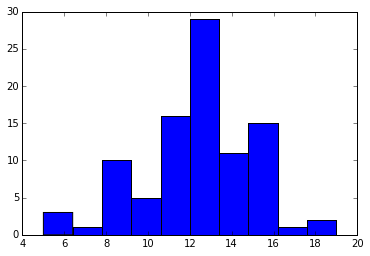

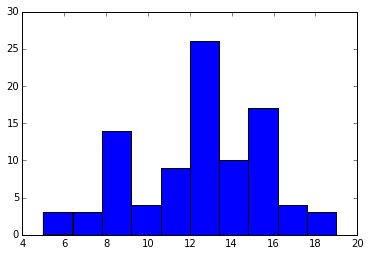

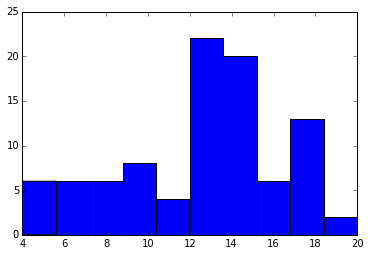

In [263]:
import matplotlib.pyplot as plt
% %matplotlib inline
plt.hist(df_men_float)
plt.show()
plt.hist(df_total_years)
plt.show()
plt.hist(df_women_years)
plt.show()

In [254]:
print df_men_float.mean()
print df_men_float.median()

12.2580645161
12.0


In [255]:
print df_women_years.mean()
print df_women_years.median()

12.4516129032
13.0


In [326]:
import sqlite3 as lite
con = lite.connect('social_stats.db')
cur = con.cursor()

In [333]:
edu_df = pd.DataFrame({'country': df_country, 'year': df_year, 'total_years': df_total_years, 'men_years': df_men_float, 'women_years': df_women_years})

In [334]:
edu_df.to_sql('education', con, if_exists='replace')

In [335]:
 edu_df

,country,men_years,total_years,women_years,year
0,Afghanistan,11,8,5,2004
1,Albania,11,11,11,2004
2,Algeria,13,13,13,2005
3,Andorra,11,11,12,2008
4,Anguilla,11,11,11,2008
5,Austria,15,15,15,2008
6,Azerbaijan,13,13,13,2008
7,Bahrain,14,14,15,2006
8,Bangladesh,8,8,8,2007
9,Belarus,14,15,15,2007
